# **Load data**

In [52]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")

df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data Prep**

###Data separation x and y

In [53]:
y=df["logS"]
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [54]:
x=df.drop("logS",axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


###Data Splitting

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [56]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [57]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**

##Linear Regretion

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Applying the Model to predict

In [59]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

###Calculate Model Preformance


In [60]:
from sklearn.metrics import mean_squared_error, r2_score

train_mean=mean_squared_error(y_train,y_train_pred)
train_r2=r2_score(y_train,y_train_pred)

test_mean=mean_squared_error(y_test,y_test_pred)
test_r2=r2_score(y_test,y_test_pred)

In [61]:
model_results=pd.DataFrame(["Linear Regression",train_mean,train_r2,test_mean,test_r2]).transpose()
model_results.columns=["Model","Training MSE","Training R2","Test MSE","Test R2"]

In [62]:
model_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


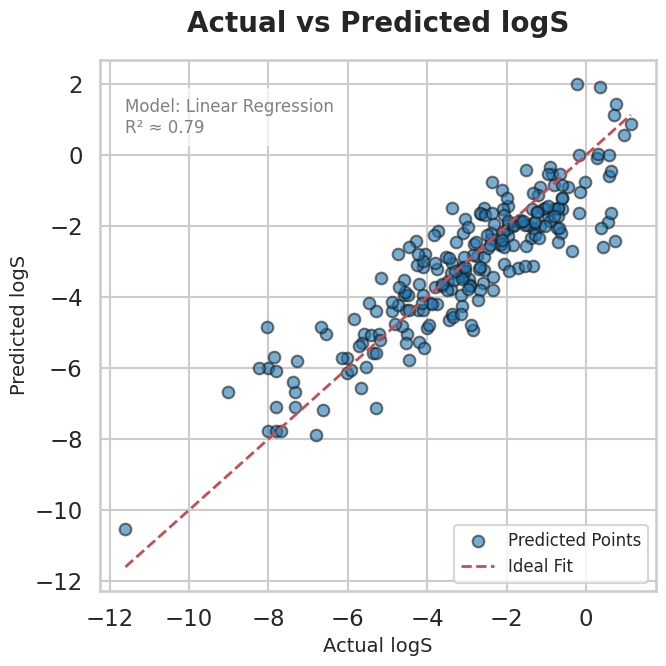

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(7, 7))

plt.scatter(y_test, y_test_pred, alpha=0.6, s=70, edgecolor="k", color="#1f77b4", label="Predicted Points")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal Fit")

plt.title("Actual vs Predicted logS", fontsize=20, weight='bold', pad=20)
plt.xlabel("Actual logS", fontsize=14)
plt.ylabel("Predicted logS", fontsize=14)

plt.legend(fontsize=12, loc="lower right", frameon=True)
plt.text(y_test.min(), y_test.max() - 0.5, "Model: Linear Regression\nR² ≈ 0.79",
         fontsize=12, color="gray", bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


In [67]:
# Get input values from the user
mollogp = float(input("Enter MolLogP: "))
molwt = float(input("Enter MolWt: "))
numrotatablebonds = float(input("Enter NumRotatableBonds: "))
aromaticproportion = float(input("Enter AromaticProportion: "))


# Create a dictionary from the input data
new_input = {
    'MolLogP': [mollogp],
    'MolWt': [molwt],
    'NumRotatableBonds': [numrotatablebonds],
    'AromaticProportion': [aromaticproportion]
}

# Create a DataFrame from the input data
new_input_df = pd.DataFrame(new_input)

# Use the trained model to predict the logS value
predicted_logS = lr.predict(new_input_df)

print(f"The predicted logS for the given input is: {round(predicted_logS[0], 4)}")

Enter MolLogP: 3.45
Enter MolWt: 72.15
Enter NumRotatableBonds: 2
Enter AromaticProportion: 0
The predicted logS for the given input is: -2.7974


**Examples for testing:**

1) **Pentane**

A non-polar, straight-chain alkane.

MolLogP: 3.45

MolWt: 72.15 g/mol

NumRotatableBonds: 2

AromaticProportion: 0.0 (no aromatic rings)

LogS: -2.59



---

2. **Acetone**

A simple polar molecule.

MolLogP: -0.24

MolWt: 58.08 g/mol

NumRotatableBonds: 0 (no single bonds that allow for rotation)

AromaticProportion: 0.0

LogS: 0.22

---

3. **2,5-Dimethylphenol**

A phenolic compound with both polar and non-polar regions.

MolLogP: 2.29

MolWt: 122.17 g/mol

NumRotatableBonds: 1

AromaticProportion: 0.67

LogS: -1.82